# Explore here

In [2]:
import pandas as pd

from dotenv import load_dotenv
load_dotenv()

import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")




In [5]:
import spotipy as sp
from spotipy.oauth2 import SpotifyClientCredentials

con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

In [23]:
artist_id = "4q3ewBCX7sLwd24euuV69X"

response = sp.artist_top_tracks("4q3ewBCX7sLwd24euuV69X")
if response:
  tracks = response["tracks"]
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

In [24]:
import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(3))

   duration_ms              name  popularity
6     3.418167            DÁKITI          77
4     3.242717         un x100to          79
7     4.061933  Tití Me Preguntó          82


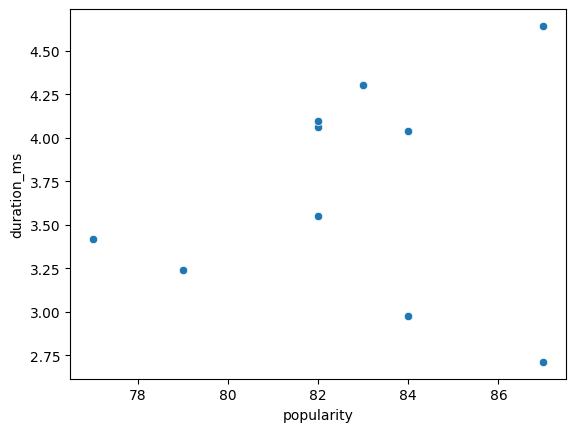

In [25]:
import seaborn as sns

scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")